#### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

### Loading the dataset

In [2]:
data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
data.sample(10)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
93019,102520,297060,0,0,0,1,0,225000.0,450000.0,21109.5,...,0,1,0,0,0,1,0,1,0,0
95290,105036,301862,0,0,0,1,1,180000.0,463284.0,22531.5,...,0,1,0,0,1,0,0,0,0,1
255920,141293,371873,1,0,1,0,1,135000.0,436032.0,28516.5,...,0,1,0,0,1,0,0,0,0,1
229504,15995,130813,1,0,1,0,1,189000.0,746280.0,59094.0,...,0,1,0,0,1,0,0,0,0,1
182838,62070,219592,1,0,0,1,1,225000.0,545040.0,26640.0,...,0,1,0,0,0,1,0,0,1,0
49299,54291,204735,0,0,0,1,0,90000.0,464463.0,25195.5,...,0,1,0,0,1,0,0,0,0,1
231947,75738,245745,1,0,1,0,1,225000.0,562491.0,23962.5,...,0,1,0,0,1,0,0,1,0,0
25498,28070,153999,0,0,1,1,1,225000.0,835380.0,35523.0,...,0,1,0,0,1,0,0,0,0,1
165824,182657,451426,0,0,0,0,1,382500.0,1546141.5,82377.0,...,0,1,0,0,1,0,0,1,0,0
20305,22363,143165,0,0,1,0,1,202500.0,257562.0,14103.0,...,0,1,0,0,0,1,0,1,0,0


### Counts of different class in Target variable

In [3]:
data['TARGET'].value_counts()

0    168113
1    168113
Name: TARGET, dtype: int64

In [5]:
#Splitting into target and no-target dataset
X = data.iloc[:,3:]
Y = data['TARGET']
X.shape, Y.shape

((336226, 57), (336226,))

In [6]:
#Splitting into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify= Y)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


## Logistic Regression model call and fit

In [7]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

### Performing different metrics

In [8]:
print(model.score(X_test, Y_test))
Y_pred = model.predict(X_test)
print(classification_report(Y_pred,Y_test))

0.5673156997263751
              precision    recall  f1-score   support

           0       0.56      0.57      0.56     49378
           1       0.58      0.57      0.57     51490

    accuracy                           0.57    100868
   macro avg       0.57      0.57      0.57    100868
weighted avg       0.57      0.57      0.57    100868



/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


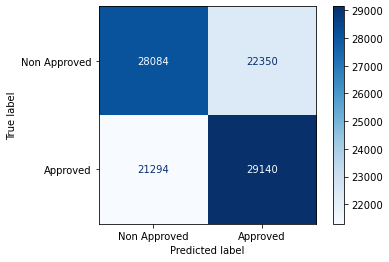

In [22]:
#Plotting the confusion matrix
plot_confusion_matrix(model, X_test, Y_test, cmap='Blues', values_format='d', display_labels=['Non Approved','Approved'])

### Grid Search CV

In [9]:
#Definiing the clsasifier for grid search
classifier = LogisticRegression()

In [12]:
#defining the parameters for grid search
parameter = {'penalty': ['l2'],
             'C': [1,2,3,4,5,6,100],
             'max_iter': [50,100]}

In [13]:
#Performing grid search
classifier_regressor = GridSearchCV(classifier, param_grid =parameter, scoring = 'accuracy', error_score='raise',cv = 5, verbose = 10)
classifier_regressor.fit(X_train, Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5; 1/14] START C=1, max_iter=50, penalty=l2...............................
[CV 1/5; 1/14] END C=1, max_iter=50, penalty=l2;, score=0.569 total time=   5.4s
[CV 2/5; 1/14] START C=1, max_iter=50, penalty=l2...............................
[CV 2/5; 1/14] END C=1, max_iter=50, penalty=l2;, score=0.565 total time=   4.6s
[CV 3/5; 1/14] START C=1, max_iter=50, penalty=l2...............................
[CV 3/5; 1/14] END C=1, max_iter=50, penalty=l2;, score=0.567 total time=   5.6s
[CV 4/5; 1/14] START C=1, max_iter=50, penalty=l2...............................
[CV 4/5; 1/14] END C=1, max_iter=50, penalty=l2;, score=0.566 total time=   5.1s
[CV 5/5; 1/14] START C=1, max_iter=50, penalty=l2...............................
[CV 5/5; 1/14] END C=1, max_iter=50, penalty=l2;, score=0.569 total time=   5.4s
[CV 1/5; 2/14] START C=1, max_iter=100, penalty=l2..............................
[CV 1/5; 2/14] END C=1, max_iter=100, penalty=l2

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 100], 'max_iter': [50, 100],
                         'penalty': ['l2']},
             scoring='accuracy', verbose=10)

### Metrics calculations

In [14]:
#printing the best parameters
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}


In [15]:
#printing the best score
print(classifier_regressor.best_score_)

0.5672719876309333


In [16]:
#Predicting the test data
y_pred = classifier_regressor.predict(X_test)

In [17]:
#Predicitng the accuracy score
score = accuracy_score(y_pred, Y_test)
print(score)

0.5673156997263751


In [18]:
#Printing the classification report
report = classification_report(y_pred,Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.57      0.56     49378
           1       0.58      0.57      0.57     51490

    accuracy                           0.57    100868
   macro avg       0.57      0.57      0.57    100868
weighted avg       0.57      0.57      0.57    100868



/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


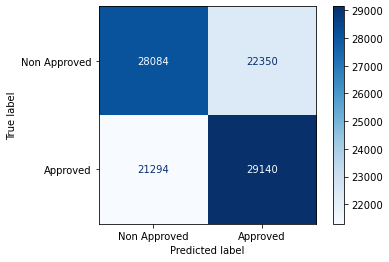

In [21]:
#Plotting the confusion matrix
plot_confusion_matrix(classifier_regressor, X_test, Y_test, cmap='Blues', values_format='d', display_labels=['Non Approved','Approved'])

### ROC curve plot

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


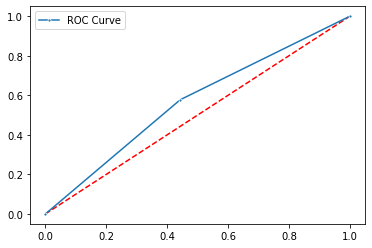

In [29]:
probs = classifier_regressor.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
sns.lineplot([0,1],[0,1], color='red', linestyle='--')
plt = sns.lineplot(fpr, tpr, marker = '.',label='ROC Curve')